# Módulo 10 atividade 1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [15]:
#leitura do arquivo previsão de renda:
dados_clientes= pd.read_csv('previsao_de_renda.csv')

In [16]:
#nome de todas as colunas:
dados_clientes.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [17]:
#apagando variáveis não úteis na análise, como unnamed que repete o índice e data
var_preditivas= dados_clientes.drop('Unnamed: 0', axis=1)
var_preditivas.drop('data_ref', axis=1)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [18]:
#matrix de correlação 
var_preditivas.corr()

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


De acordo com a matriz de correlação, não há FORTES correlações de outras variáveis com a renda. 

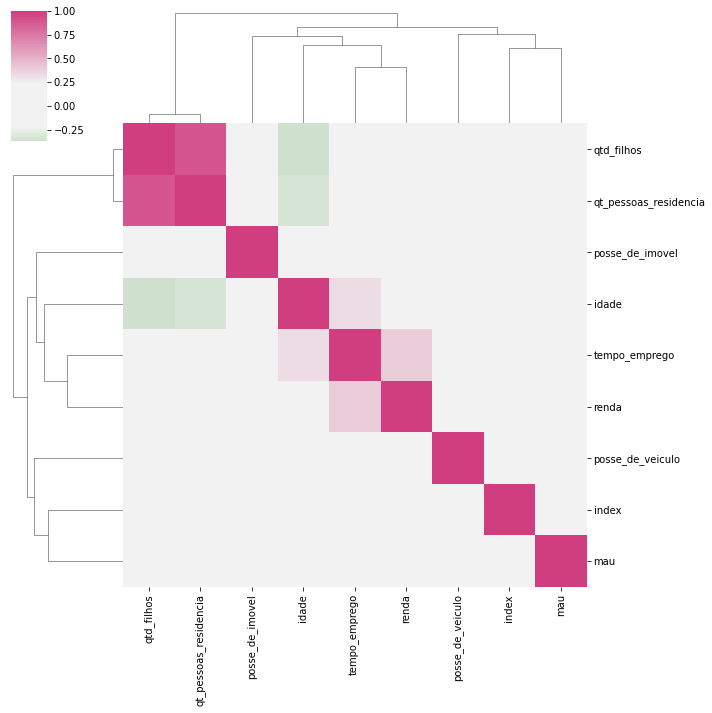

In [19]:
#gráfico indicado p correlação de muitas variáveis
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
#hneg e hpos são as cores do positivo e negativo, ascmap true é para mapeamento de cores, center=light é p centrar em uma cor clara
sns.clustermap(var_preditivas.corr(), figsize=(10, 10), center = 0, cmap=cmap)
#center=0 é importante p que fique branco próximo ou no 0

Confirmando a suspeita anterior, o ClusterMap nos mostra que não há fortes correlações com a renda, apenas uma variável está um pouco correlacionada com ela, que é a variável tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

De acorco com o exposto acima, há apenas uma variável correlacionada com renda, que é a variável tempo_emprego. 

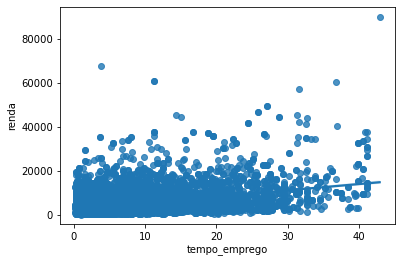

In [20]:
#plotando o gráfico da váriavél renda x tempo de emprego
_ = sns.regplot(x='tempo_emprego', y='renda', data = var_preditivas)


3) Na sua opinião, há outliers na variável renda?

Analisando brevemente o gráfico, o valor acima de 80 mil parecem estar um pouco distante dos demais, mas como essa distância não é absurdamente grande, podemos testar outros métodos de análise. 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [ ]:
#criando uma nova variável que receberá uma cópia das var_preditivas:
var_preditivas_log= var_preditivas.copy()

In [21]:
#nessa nova variável, criando uma coluna que receberá o log de renda:
var_preditivas_log['log_y']= np.log(var_preditivas['renda'])

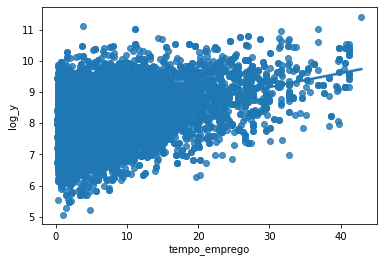

In [22]:
#plotando o gráfico log de renda x tempo de emprego
_ = sns.regplot(x='tempo_emprego', y='log_y', data = var_preditivas_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Com a aplicação do log parece não haver outliers na análise e também ressalta que quanto maior o tempo de emprego, maior o salário, podendo dizer assim que ele melhorou a experiência de visualização do gráfico.

In [23]:
var_preditivas_log[['tempo_emprego', 'renda', 'log_y']].corr()

,tempo_emprego,renda,log_y
tempo_emprego,1.000000,0.394235,0.379556
renda,0.394235,1.000000,0.835734
log_y,0.379556,0.835734,1.000000
